# Object-oriented implementation of univariate Bayesian parameter estimation

In [7]:
%matplotlib notebook

import numpy as np
from numpy.testing import assert_approx_equal
import scipy
import matplotlib as mpl
from matplotlib.pyplot import *
from scipy import *
from scipy import stats, special, integrate

try:
    import myplot
    from myplot import close_all, csavefig
    #myplot.tex_on()
    csavefig.save = False
except ImportError:
    pass

## See `univariate_bayes` module

In [8]:
from univariate_bayes import UnivariateBayesianInference

---
# Poisson rate estimation

In [9]:
class PoissonRateInference(UnivariateBayesianInference):
    """
    Bayesian inference for a Poisson rate.
    """
 
    def __init__(self, intvl, n, prior, r_u, r_l=0, nr=200):
        """
        Define a posterior PDF for a Poisson rate.

        Parameters
        ----------
        intvl : float
            Interval for observations

        n : int
            Counts observed

        prior : const or function
            Prior PDF for the rate, as a constant for flat prior, or
            a function that can evaluate the PDF on an array

        r_u : float
            Upper limit on rate for evaluating the PDF
        """
        self.intvl = intvl
        self.n = n
        self.r_l, self.r_u = r_l, r_u
        self.nr = nr
        self.rvals = linspace(r_l, r_u, nr)

        # Pass info to the base class initializer.
        super(PoissonRateInference, self).__init__(self.rvals, prior, self.lfunc)

    def lfunc(self, rvals):
        """
        Evaluate the Poisson likelihood function on a grid of rates.
        """
        r_intvl = self.intvl*rvals
        return (r_intvl)**self.n * exp(-r_intvl)

<IPython.core.display.Javascript object>


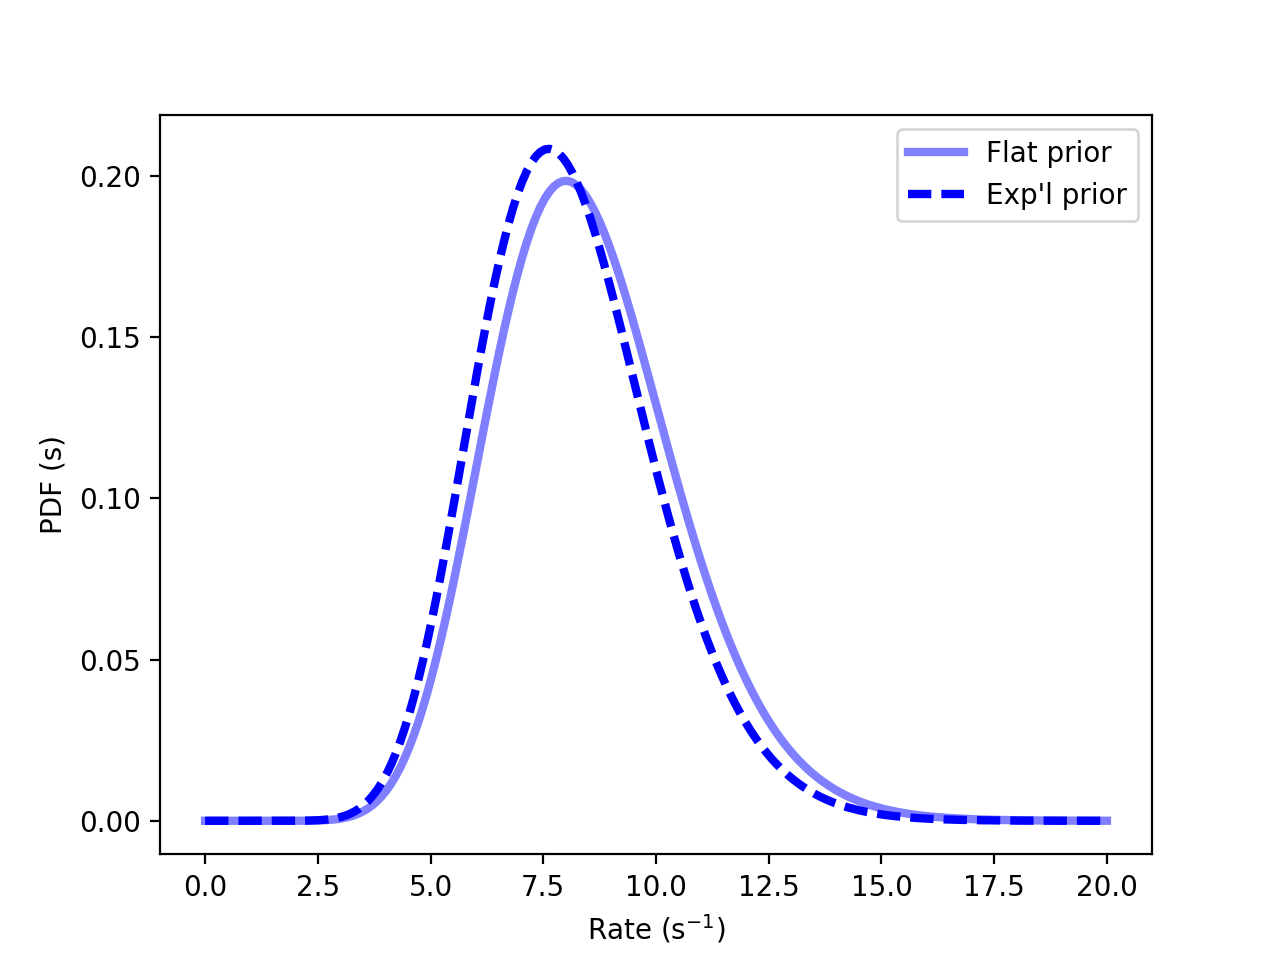

In [10]:
r_u = 20.  # upper limit for PDF calculation and plotting

# Flat prior case:
prior_l, prior_u = 0., 1e5
flat_pdf = 1./(prior_u - prior_l)
n, T = 16, 2
pri1 = PoissonRateInference(T, n, flat_pdf, r_u)
pri1.plot(alpha=.5, label='Flat prior')

# Exp'l prior:
scale = 10.
gamma1 = stats.gamma(1, scale=scale)  # a=1 is exp'l dist'n

pri2 = PoissonRateInference(T, n, gamma1.pdf, r_u)
pri2.plot(ls='b--', label="Exp'l prior")


xlabel(r'Rate (s$^{-1}$)')
ylabel('PDF (s)')
legend()

---
# Binomial parameter estimation

In [11]:
class BinomialInference(UnivariateBayesianInference):
    """
    Bayesian inference for the probability of a Bernoulli outcome, based
    on binomial data.
    """
 
    def __init__(self, n, n_trials, prior=1., na=200, arange=(0.,1.)):
        """
        Define a posterior PDF for the probability of a Bernoulli outcome,
        alpha, based on binomail data.

        Parameters
        ----------

        n : int
            Number of successes

        n_trials : int
            Number of trials (>= n)

        prior : const or function
            Prior PDF for alpha, as a constant for flat prior, or
            a function that can evaluate the PDF on an array
        """
        self.n, self.n_trials = n, n_trials
        self.na = na
        self.alphas = linspace(arange[0], arange[1], na)

        # Pass info to the base class initializer.
        super(BinomialInference, self).__init__(self.alphas, prior, self.lfunc)

    def lfunc(self, alphas):
        """
        Evaluate the Binomial likelihood function on a grid of alphas.
        """
        # Ignore the combinatorial factor (indep. of alpha).
        return (alphas)**self.n * (1.-alphas)**(self.n_trials - self.n)

<IPython.core.display.Javascript object>


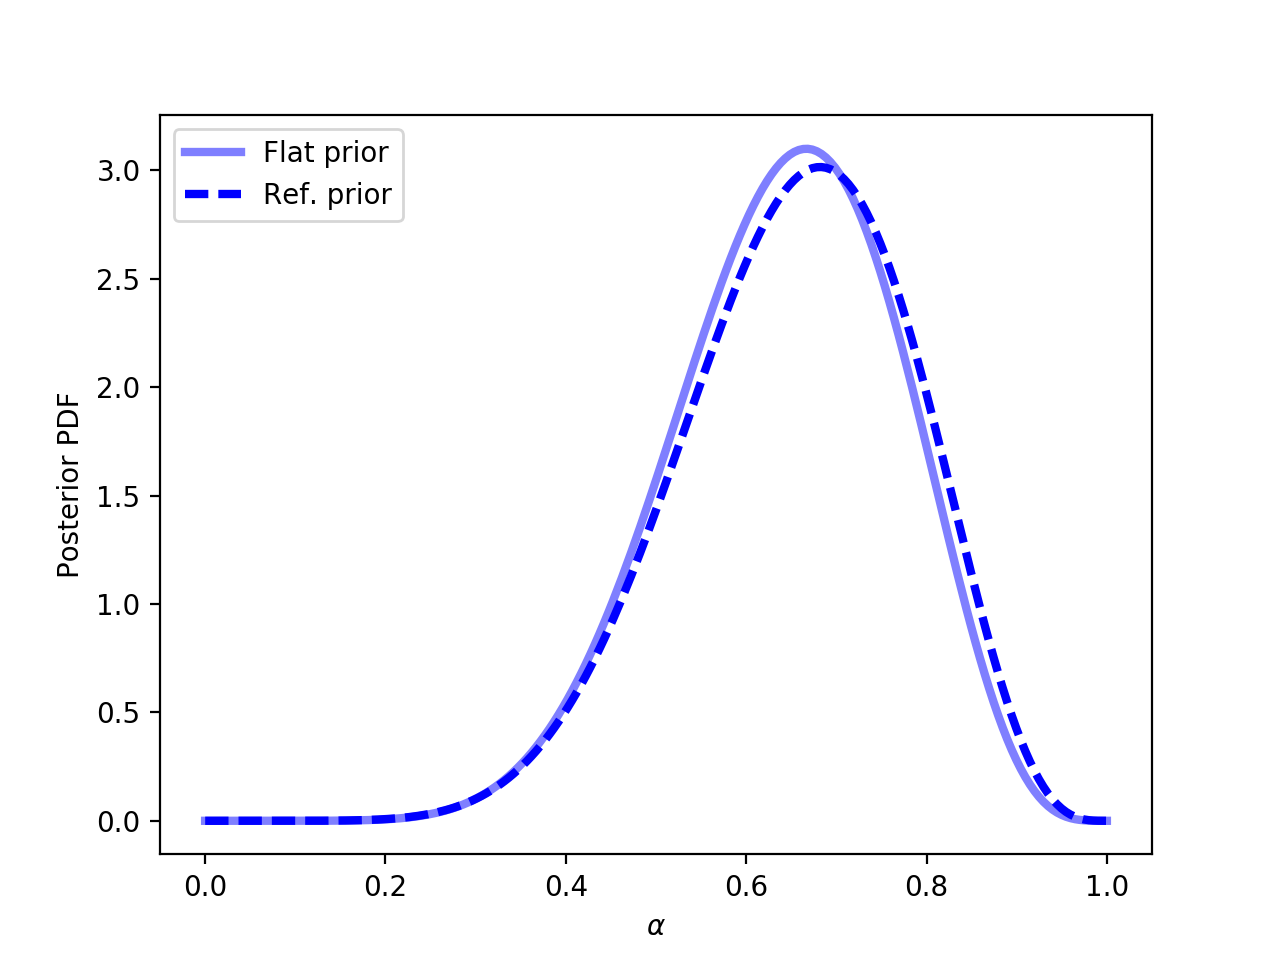

In [12]:
# Define the data.
n, n_trials = 8, 12
bfig = figure()  # separate figure for binomial cases

# Flat prior case:
bi1 = BinomialInference(n, n_trials)
bi1.plot(alpha=.5, label='Flat prior')

# Reference prior case:
beta_half = stats.beta(a=.5, b=.5)
bi2 = BinomialInference(n, n_trials, beta_half.pdf, arange=(1.e-4, 1-1.e-4))
bi2.plot(ls='b--', label='Ref. prior')

xlabel(r'$\alpha$')
ylabel('Posterior PDF')
legend(loc='upper left')